In [44]:
# Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import linear_model

# Data reading and cleaning

In [52]:
df = pd.read_excel(r"C:\Users\ljant\Desktop\Ironhack\Projects\Project_3\Datafiles\Past_Data.xlsx")
df
# 570554 × 10 columns

,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


In [53]:
def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


In [54]:
# Check for duplicates
df.drop_duplicates()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


In [55]:
# Look at overall statistics of the data
df.describe()

,index,store_id,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,570554.000000,570554.000000,570554.000000,570554.000000,570554.000000,570554.000000,570554.000000,570554.000000
mean,356042.516941,558.555851,3.998694,633.787650,0.830433,0.379307,0.182169,5747.951561
std,205631.504529,321.795006,1.997944,464.853366,0.375252,0.485215,0.385984,3840.647305
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177740.250000,281.000000,2.000000,403.000000,1.000000,0.000000,0.000000,3703.000000
50%,356242.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5709.000000
75%,534193.500000,837.000000,6.000000,839.000000,1.000000,1.000000,0.000000,7818.000000
max,712044.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,38722.000000


In [56]:
# seperating the 'date' column into day, month, year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
0,511306,52,2,2013-01-01,0,0,0,a,1,0,1,1,2013
1,150763,677,2,2013-01-01,0,0,0,a,1,0,1,1,2013
2,633749,348,2,2013-01-01,0,0,0,a,1,0,1,1,2013
3,106460,966,2,2013-01-01,0,0,0,a,1,0,1,1,2013
4,278363,750,2,2013-01-01,0,0,0,a,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856,22,4,2015
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154,22,4,2015
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923,22,4,2015
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974,22,4,2015


In [57]:
df = df.drop(['date'], axis = 1)
df

,index,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
0,511306,52,2,0,0,0,a,1,0,1,1,2013
1,150763,677,2,0,0,0,a,1,0,1,1,2013
2,633749,348,2,0,0,0,a,1,0,1,1,2013
3,106460,966,2,0,0,0,a,1,0,1,1,2013
4,278363,750,2,0,0,0,a,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,416,1,0,0,0,3856,22,4,2015
570550,373333,715,3,613,1,0,0,0,5154,22,4,2015
570551,586351,93,3,553,1,0,0,0,4923,22,4,2015
570552,672462,845,3,302,1,0,0,0,3974,22,4,2015


In [58]:
# Checking datatypes
data_types = df.dtypes
print (data_types)

def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float', 'datetime64']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col

df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

index                   int64
store_id                int64
day_of_week             int64
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
day                     int64
month                   int64
year                    int64
dtype: object


In [59]:
print(df_num['day_of_week'].value_counts())

3    81938
2    81884
5    81535
6    81494
4    81421
7    81214
1    81068
Name: day_of_week, dtype: int64


In [60]:
# Changing 'state_holiday' into numeric
df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 1, 'c': 1})
df

,index,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
0,511306,52,2,0,0,0,1,1,0,1,1,2013
1,150763,677,2,0,0,0,1,1,0,1,1,2013
2,633749,348,2,0,0,0,1,1,0,1,1,2013
3,106460,966,2,0,0,0,1,1,0,1,1,2013
4,278363,750,2,0,0,0,1,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,416,1,0,0,0,3856,22,4,2015
570550,373333,715,3,613,1,0,0,0,5154,22,4,2015
570551,586351,93,3,553,1,0,0,0,4923,22,4,2015
570552,672462,845,3,302,1,0,0,0,3974,22,4,2015


In [61]:
df['weekday'] = df['day_of_week'].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6:0, 7:0})
df = df.drop(['day_of_week'], axis = 1)
df

,index,store_id,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,weekday
0,511306,52,0,0,0,1,1,0,1,1,2013,1
1,150763,677,0,0,0,1,1,0,1,1,2013,1
2,633749,348,0,0,0,1,1,0,1,1,2013,1
3,106460,966,0,0,0,1,1,0,1,1,2013,1
4,278363,750,0,0,0,1,1,0,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,416,1,0,0,0,3856,22,4,2015,1
570550,373333,715,613,1,0,0,0,5154,22,4,2015,1
570551,586351,93,553,1,0,0,0,4923,22,4,2015,1
570552,672462,845,302,1,0,0,0,3974,22,4,2015,1


# Data Distribution

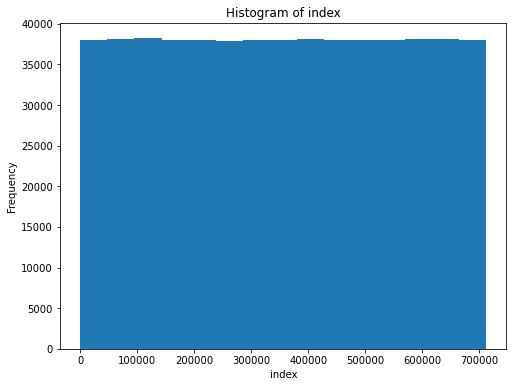

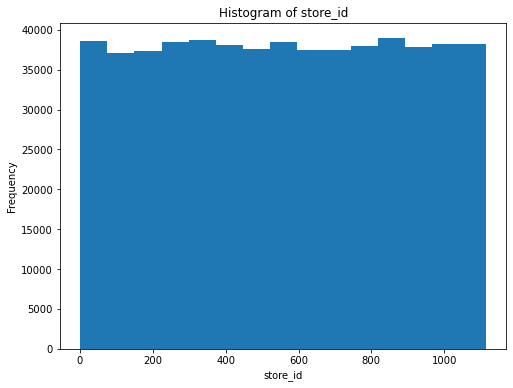

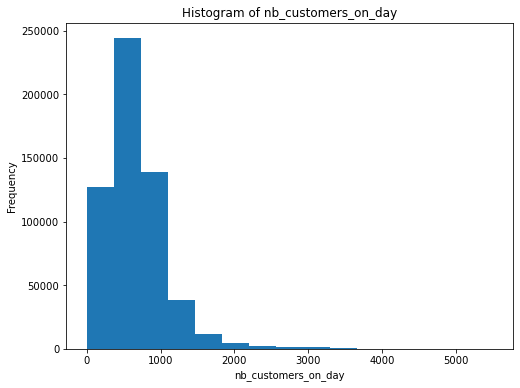

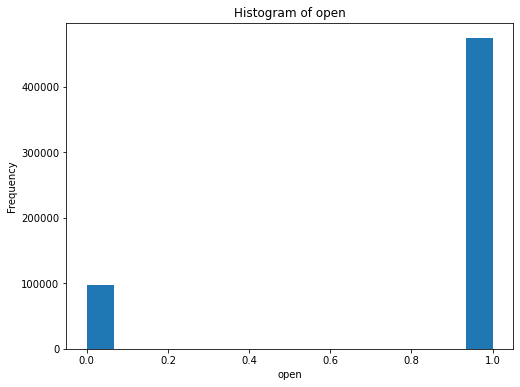

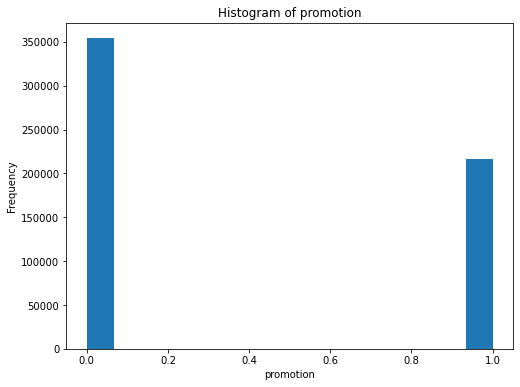

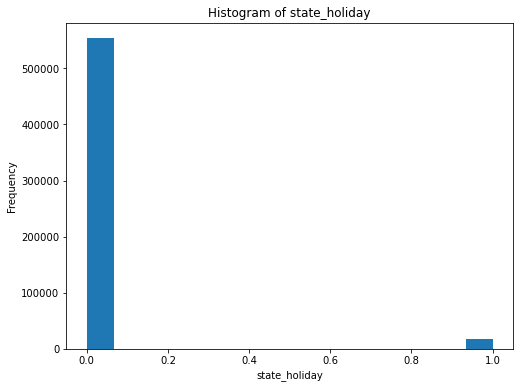

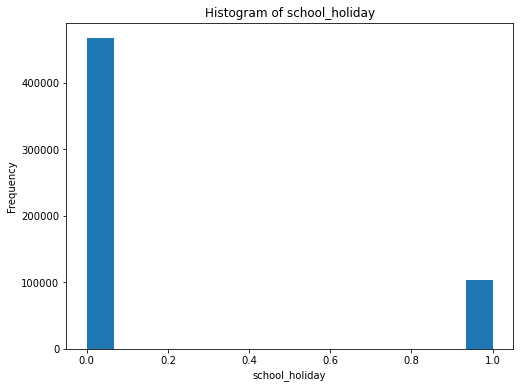

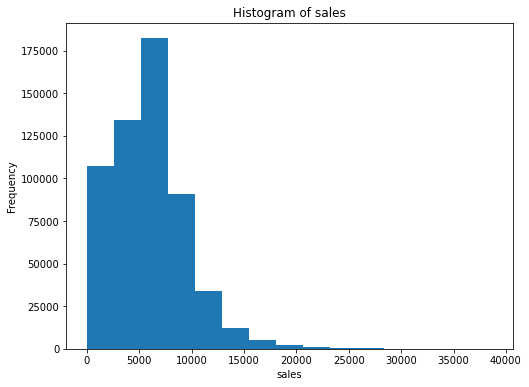

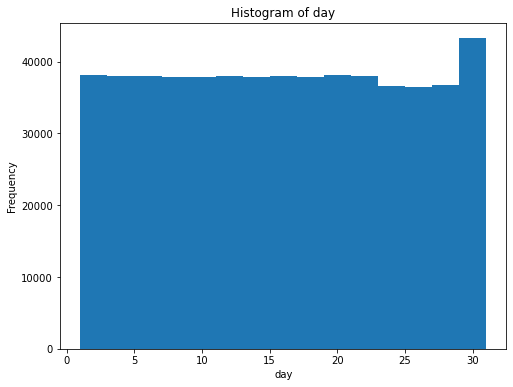

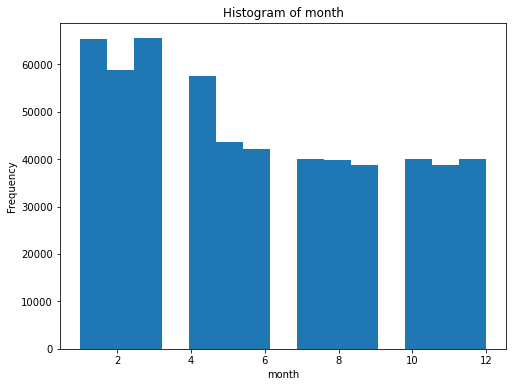

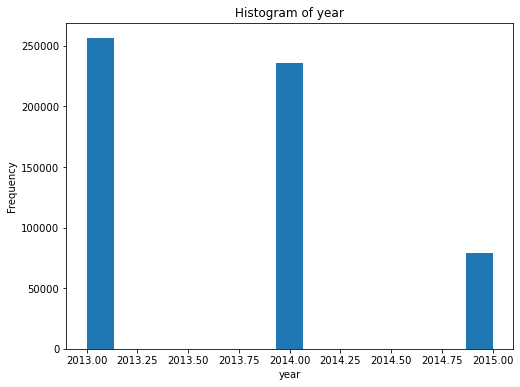

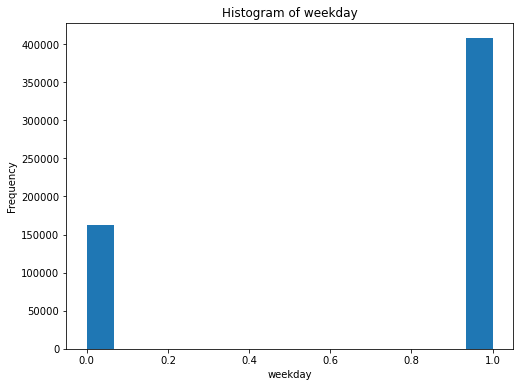

In [12]:
# hitsplots
def histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', bins=15, title=f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

histograms(df)

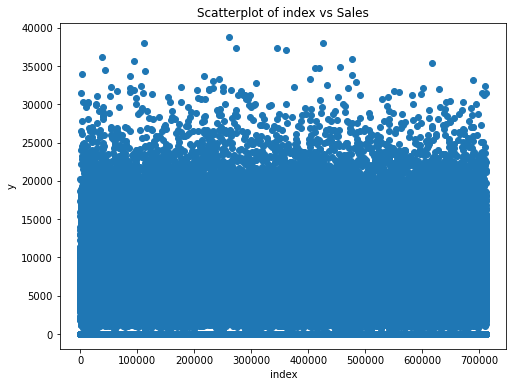

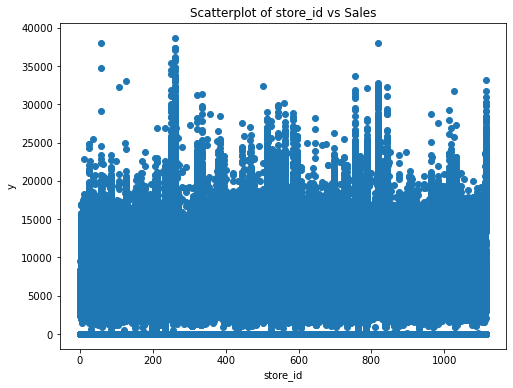

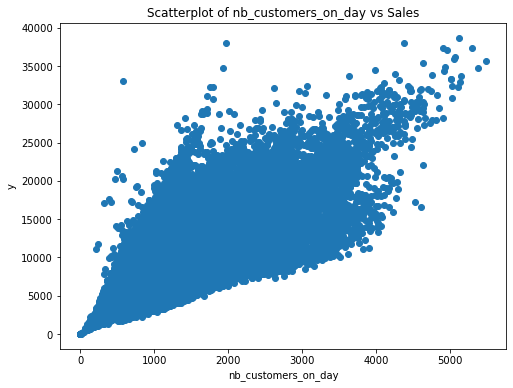

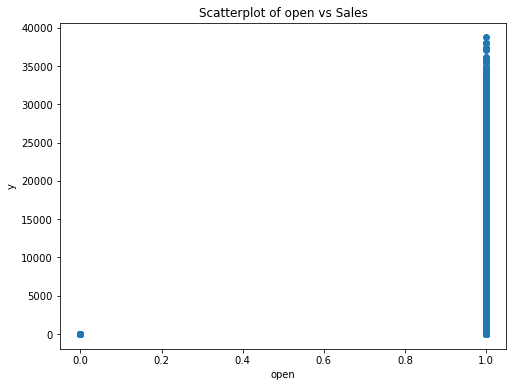

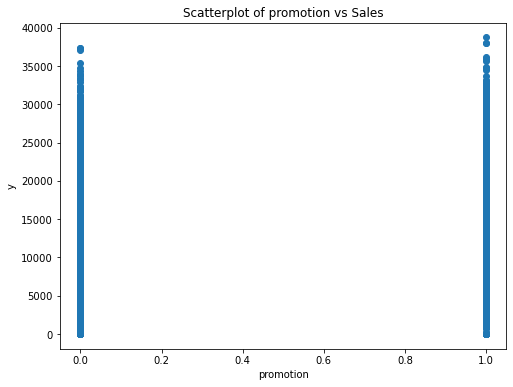

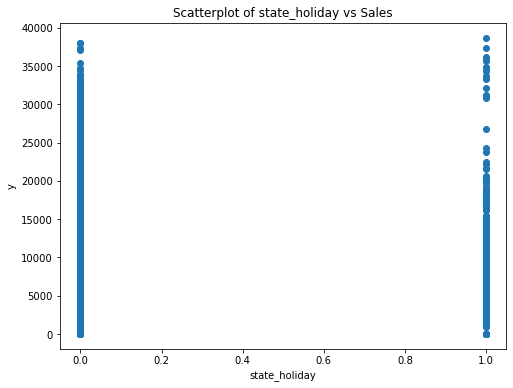

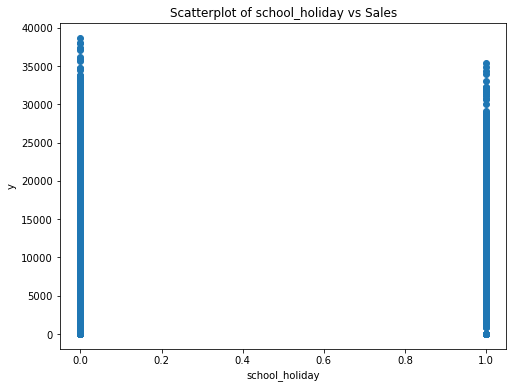

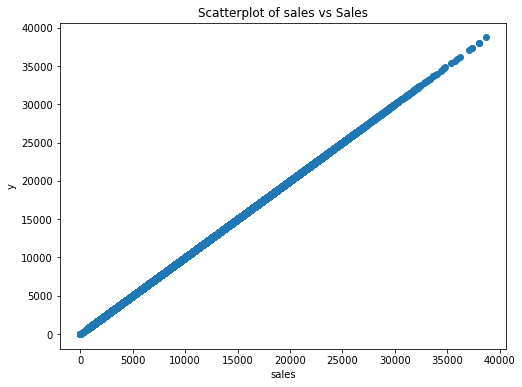

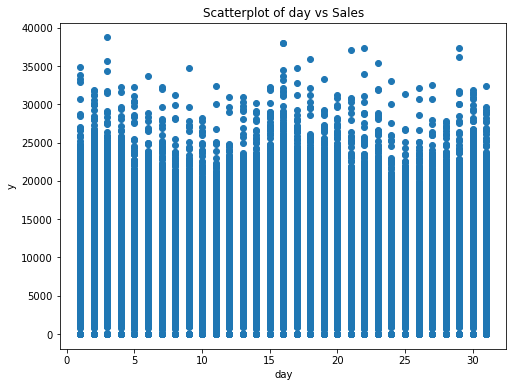

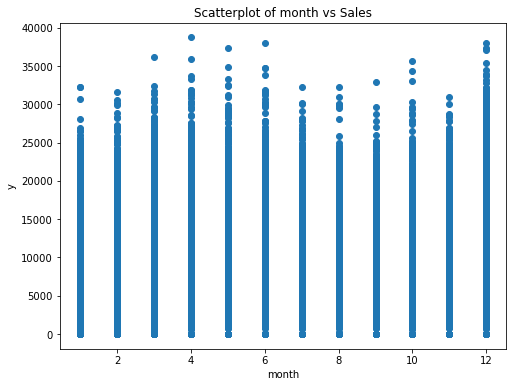

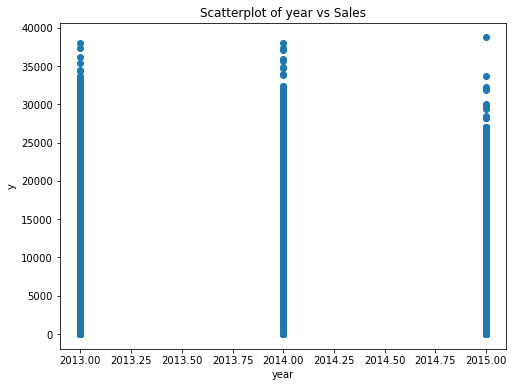

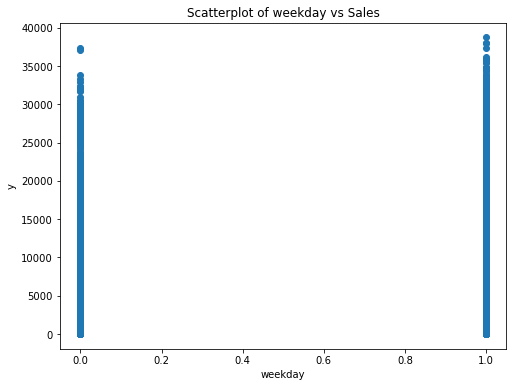

In [13]:
# Scatterplots

df_num = df.select_dtypes('number')
df_num.drop(['sales'], axis = 1)

# Creating scatterplots for each numeric column
for column in df_num:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_num[column], df['sales'])
    plt.xlabel(column)
    plt.ylabel('y')
    plt.title(f'Scatterplot of {column} vs Sales')
    plt.show()

# Checking for Correlations

In [14]:
df_corr = df.corr()
df_corr

,index,store_id,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,weekday
index,1.000000,-0.000690,-0.000694,0.001254,-0.001477,-0.001636,-0.001149,-0.000090,0.000380,-0.002690,-0.001578,0.000895
store_id,-0.000690,1.000000,0.023931,-0.000827,0.000393,0.000869,-0.000395,0.005140,-0.001426,0.001387,0.000889,-0.000339
nb_customers_on_day,-0.000694,0.023931,1.000000,0.616093,0.316362,-0.224616,0.066315,0.896997,-0.004347,0.040948,-0.001261,0.388442
open,0.001254,-0.000827,0.616093,1.000000,0.295969,-0.375933,0.076480,0.676281,0.035486,-0.003387,-0.000529,0.538451
promotion,-0.001477,0.000393,0.316362,0.295969,1.000000,-0.017211,0.056861,0.451064,-0.111102,-0.012837,0.021251,0.493757
state_holiday,-0.001636,0.000869,-0.224616,-0.375933,-0.017211,1.000000,0.173836,-0.251601,-0.060938,0.005425,-0.001428,0.100731
school_holiday,-0.001149,-0.000395,0.066315,0.076480,0.056861,0.173836,1.000000,0.078569,0.018394,0.098103,-0.029456,0.264015
sales,-0.000090,0.005140,0.896997,0.676281,0.451064,-0.251601,0.078569,1.000000,-0.014952,0.051951,0.015412,0.448100
day,0.000380,-0.001426,-0.004347,0.035486,-0.111102,-0.060938,0.018394,-0.014952,1.000000,0.019439,-0.028647,0.001849
month,-0.002690,0.001387,0.040948,-0.003387,-0.012837,0.005425,0.098103,0.051951,0.019439,1.000000,-0.317436,-0.002232


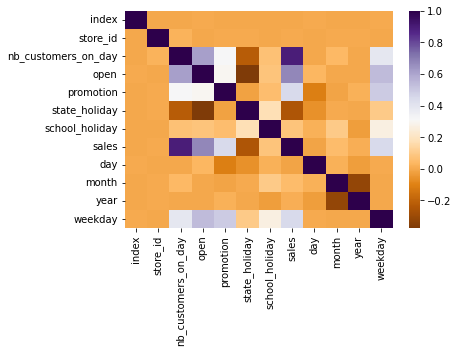

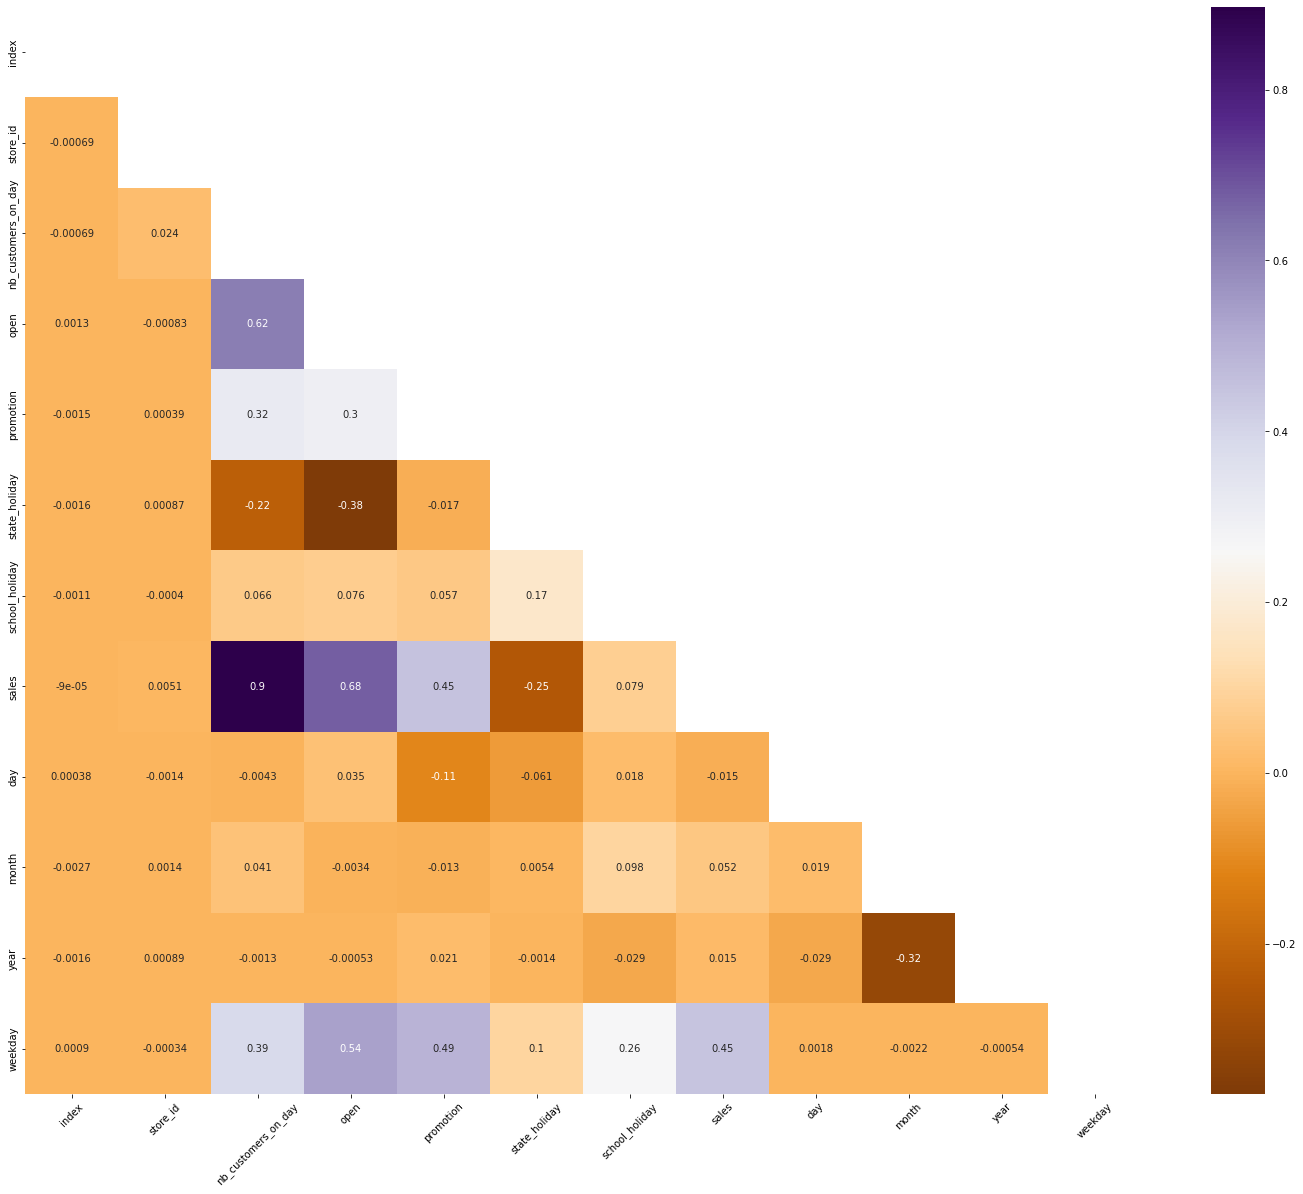

In [15]:
sns.heatmap(df_corr, annot=False, cmap="PuOr")
plt.show()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap="PuOr")
plt.xticks(rotation=45)
plt.show()

# Dealing with outliers

In [62]:
def outliers_iqr(data, columns, threshold=1.5):
    df_adj = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_adj = df_adj[(df_adj[column] >= lower_bound) & (df_adj[column] <= upper_bound)]

    return df_adj

df = outliers_iqr(df, ['nb_customers_on_day', 'sales'], threshold=1.5).reset_index(drop = True)

# Train-Test-Split

In [13]:
X = df.drop('sales', axis = 1)
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression

In [40]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.058e+06
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        20:54:56   Log-Likelihood:                     -3.7047e+06
No. Observations:              435901   AIC:                                  7.409e+06
Df Residuals:                  435890   BIC:                                  7.410e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
index                1.465e-05   8.75e-06      1.674      0.094   -2.51e-06    3.18e-05
store_id               -0.1256      0.006    -22.597      0.000      -0.137      -0.115
nb_customers_on_day     6.8873      0.008    856.331      0.000       6.872       6.903
open                 1331.3023      8.217    162.021      0.000    1315.198    1347.407
promotion            1181.9189      4.427    266.991      0.000    1173.242    1190.595
state_holiday        -247.7264     12.366    -20.033      0.000    -271.963    -223.489
school_holiday         94.0211      4.961     18.951      0.000      84.297     103.745
day                    -0.2560      0.208     -1.230      0.219      -0.664       0.152
month                  16.1636      0.518     31.186      0.000      15.148      17.179
year                   -0.0142      0.004     -3.667      0.000      -0.022      -0.007
weekday              -221.8890      5.770    -38.453      0.000    -233.199    -210.579
==============================================================================
Omnibus:                    32468.399   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88828.863
Skew:                           0.420   Prob(JB):                         0.00
Kurtosis:                       5.046   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))

mse = mean_squared_error(Y_test, predictions)
print("The root mse of the model is = ",round(np.sqrt(mse),2))

R2 value is =  0.87
The root mse of the model is =  1185.22


# Quantile Transformers

In [46]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
lm = LinearRegression()
transformed_lm = TransformedTargetRegressor(regressor=lm, transformer=QuantileTransformer(output_distribution='normal'))
transformed_lm.fit(X_train, Y_train)

predictions = transformed_lm.predict(X_test)

print("R2 value is = ", round(r2_score(Y_test, predictions), 2))
mse = mean_squared_error(Y_test, predictions)
print("The root mse of the model is = ", round(np.sqrt(mse), 2))

R2 value is =  0.87
The root mse of the model is =  1186.24


# Decision Trees

In [19]:
tree = DecisionTreeRegressor(max_depth = 7)
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))

mse = mean_squared_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))


R2 value is =  0.87
The mse of the model is =  1331181.98
The root mse of the model is =  1153.77


# Quantile Transformer

In [23]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
tree = DecisionTreeRegressor()
tree = TransformedTargetRegressor(regressor=tree, transformer=QuantileTransformer(output_distribution='normal'))
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))

mse = mean_squared_error(Y_test, predictions)
print("The root mse of the model is = ",round(np.sqrt(mse),2))

R2 value is =  0.89
The mse of the model is =  1166928.44
The root mse of the model is =  1080.24


# Adjusted data

In [63]:
df=df[df['open']==1]

df['avg_sales_by_customer']=df['sales']/df['nb_customers_on_day']

a=df.groupby('store_id')['avg_sales_by_customer'].mean()

df = pd.merge(df,
                     a,
                     on ='store_id',
                     how ='left')
df['avg_sales_by_customer_by_store']=df['avg_sales_by_customer_y']

,index,store_id,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,weekday,avg_sales_by_customer_x,avg_sales_by_customer_y,avg_sales_by_customer_by_store
0,580156,676,777,1,0,1,1,3821,1,1,2013,1,4.917632,4.235485,4.235485
1,277247,274,729,1,0,1,1,3102,1,1,2013,1,4.255144,3.976554,3.976554
2,239216,259,1444,1,0,1,1,6851,1,1,2013,1,4.744460,4.861113,4.861113
3,60765,769,1248,1,0,1,1,5035,1,1,2013,1,4.034455,4.596674,4.596674
4,587920,512,625,1,0,1,1,2646,1,1,2013,1,4.233600,4.238388,4.238388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448125,162217,126,416,1,0,0,0,3856,22,4,2015,1,9.269231,11.234576,11.234576
448126,373333,715,613,1,0,0,0,5154,22,4,2015,1,8.407830,9.491519,9.491519
448127,586351,93,553,1,0,0,0,4923,22,4,2015,1,8.902351,9.754830,9.754830
448128,672462,845,302,1,0,0,0,3974,22,4,2015,1,13.158940,13.315213,13.315213


In [64]:
df = df.drop(['avg_sales_by_customer_x', 'avg_sales_by_customer_y', 'store_id', 'open', 'index', 'day', 'month', 'year'], axis = 1)
df

,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,weekday,avg_sales_by_customer_by_store
0,777,0,1,1,3821,1,4.235485
1,729,0,1,1,3102,1,3.976554
2,1444,0,1,1,6851,1,4.861113
3,1248,0,1,1,5035,1,4.596674
4,625,0,1,1,2646,1,4.238388
...,...,...,...,...,...,...,...
448125,416,0,0,0,3856,1,11.234576
448126,613,0,0,0,5154,1,9.491519
448127,553,0,0,0,4923,1,9.754830
448128,302,0,0,0,3974,1,13.315213


In [65]:
X = df.drop('sales', axis = 1)
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Gradient Boosting

pip install xgboost

In [29]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    model = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(Y_test, prediction),3), round(mean_squared_error(Y_test, prediction),2),round(np.sqrt(mean_squared_error(Y_test, prediction)),2) 

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(), RandomForestRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MSE', 'RMSE'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 358504, number of used features: 6
[LightGBM] [Info] Start training from score 0.024092


,Model,Score,MSE,RMSE
0,GradientBoostingRegressor,0.957,243526.69,493.48
1,LGBMRegressor,0.958,234829.92,484.59
2,XGBRFRegressor,0.930,389835.68,624.37
3,RandomForestRegressor,0.957,242427.80,492.37


In [ ]:
''' 
The Random Forest generates the best result
'''

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 50, max_depth = 7, random_state = 42)
forest.fit(X_train, Y_train)

predictions = forest.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
mse = mean_squared_error(Y_test, predictions)
print("The root mse of the model is = ",round(np.sqrt(mse),2))

R2 value is =  0.88
The root mse of the model is =  1147.98


# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [400, 300, 200, 100, 75, 50],  
              'max_depth': [2, 4, 6, 8],
              'min_samples_split' : [2, 4],
              'min_samples_leaf' : [1,2] 
}
                
grid = GridSearchCV(RandomForestRegressor(), param_grid, return_train_score = True, cv = 5, n_jobs=-1) 
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, Y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_leaf = ["min_samples_leaf"], min_samples_split = ['min_samples_split'])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, Y_train)
predictions = regr_trans.predict(X_test)

#evaluate metrics
r2_score(Y_test, predictions), mean_squared_error(Y_test, predictions), np.sqrt(mean_squared_error(Y_test, predictions))

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


InvalidParameterError: The 'min_samples_leaf' parameter of RandomForestRegressor must be an int in the range [1, inf) or a float in the range (0.0, 1.0). Got ['min_samples_leaf'] instead.

In [22]:
from sklearn.model_selection import GridSearchCV

# 1. Define parameter grid
param_grid = {'n_estimators' : [50, 100, 200],
              'max_depth' : [2, 4, 6],
              'min_samples_split' : [2, 4],
              'min_samples_leaf' : [1,2] 
}

# 2. Define which model to test
forest = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest, param_grid, cv = 5, return_train_score = True, n_jobs = -1)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [26]:
# Adjusted model

forest = RandomForestRegressor(n_estimators = 200, max_depth = 6, random_state = 42, min_samples_leaf = 2, min_samples_split = 2)
forest.fit(X_train, Y_train)

predictions = forest.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))

mse = mean_squared_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))

R2 value is =  0.87
The mse of the model is =  1930411.59
The root mse of the model is =  1389.39
The mean absolute error of the model is =  912.14


# Linear Regression 2.0

In [48]:
std_scl = StandardScaler()
pca = decomposition.PCA()
linear = linear_model.LinearRegression()

In [50]:
pipe = Pipeline(steps=[('std_scl', std_scl),
                           ('pca', pca),
                           ('linear', linear)])
n_components = list(range(1,X.shape[1]+1,1))
normalize = [True, False]
parameters = dict(pca__n_components=n_components)

clf = GridSearchCV(pipe, parameters)
clf.fit(X, Y)
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['linear'])

Best Number Of Components: 11

LinearRegression()


# test

In [127]:
X = df[['nb_customers_on_day', 'open', 'promotion','weekday']]
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          2.421e+06
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:38:00   Log-Likelihood:                     -3.0092e+06
No. Observations:              358504   AIC:                                  6.019e+06
Df Residuals:                  358498   BIC:                                  6.019e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nb_customers_on_day                6.5614      0.006   1114.576      0.000       6.550       6.573
promotion                       1261.6815      4.007    314.906      0.000    1253.829    1269.534
state_holiday                   -989.8048     68.932    -14.359      0.000   -1124.910    -854.700
school_holiday                   100.0391      4.624     21.636      0.000      90.977     109.101
weekday                         -841.2164      5.157   -163.123      0.000    -851.324    -831.109
avg_sales_by_customer_by_store   224.6586      0.475    472.597      0.000     223.727     225.590
==============================================================================
Omnibus:                    37364.638   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68480.321
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       4.604   Cond. No.                     2.86e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))

mse = mean_squared_error(Y_test, predictions)
print("The root mse of the model is = ",round(np.sqrt(mse),2))

R2 value is =  0.79
The root mse of the model is =  1073.75


# Esembling Linear regresion and decision trees